In [120]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

from scipy.stats import norm,skew

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [128]:
# Loading dataset
train=pd.read_csv(r"C:\Users\LInBlue\Desktop\Interview Preparation\Tabular feb\tabular-playground-series-feb-2021\train.csv")
test=pd.read_csv(r"C:\Users\LInBlue\Desktop\Interview Preparation\Tabular feb\tabular-playground-series-feb-2021\test.csv")
submission=pd.read_csv(r"C:\Users\LInBlue\Desktop\Interview Preparation\Tabular feb\tabular-playground-series-feb-2021\sample_submission.csv")

In [5]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [6]:
test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,A,B,A,C,B,D,A,E,E,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,5,A,B,A,C,B,D,A,E,C,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,15,A,B,A,C,B,D,A,E,C,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,16,A,A,B,A,B,D,A,E,E,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,17,A,B,A,A,B,B,A,E,E,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
id        300000 non-null int64
cat0      300000 non-null object
cat1      300000 non-null object
cat2      300000 non-null object
cat3      300000 non-null object
cat4      300000 non-null object
cat5      300000 non-null object
cat6      300000 non-null object
cat7      300000 non-null object
cat8      300000 non-null object
cat9      300000 non-null object
cont0     300000 non-null float64
cont1     300000 non-null float64
cont2     300000 non-null float64
cont3     300000 non-null float64
cont4     300000 non-null float64
cont5     300000 non-null float64
cont6     300000 non-null float64
cont7     300000 non-null float64
cont8     300000 non-null float64
cont9     300000 non-null float64
cont10    300000 non-null float64
cont11    300000 non-null float64
cont12    300000 non-null float64
cont13    300000 non-null float64
target    300000 non-null float64
dtypes: float64(1

In [8]:
train.shape

(300000, 26)

In [9]:
test.shape

(200000, 25)

In [10]:
submission.shape

(200000, 2)

In [11]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349,7.456260
std,144450.150010,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218,0.887295
min,1.000000,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121,0.000000
25%,124772.500000,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289,6.798341
50%,250002.500000,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909,7.496503
75%,375226.500000,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870,8.161166
max,499999.000000,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370,0.873579,10.309208


[Text(0.5, 0, 'target')]

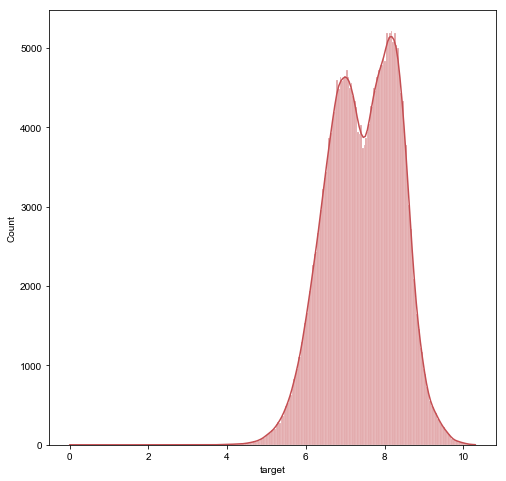

In [15]:
f,ax=plt.subplots(figsize=(8,8))
sns.set_style("white")
sns.set_color_codes(palette='deep')
sns.histplot(train.target,kde=True,color='r')
ax.set(xlabel='target')

In [129]:
# cat and cont feature names
cont_features = [f'cont{x}' for x in range(0,14)]
cat_features = [f'cat{x}' for x in range(0,10)]


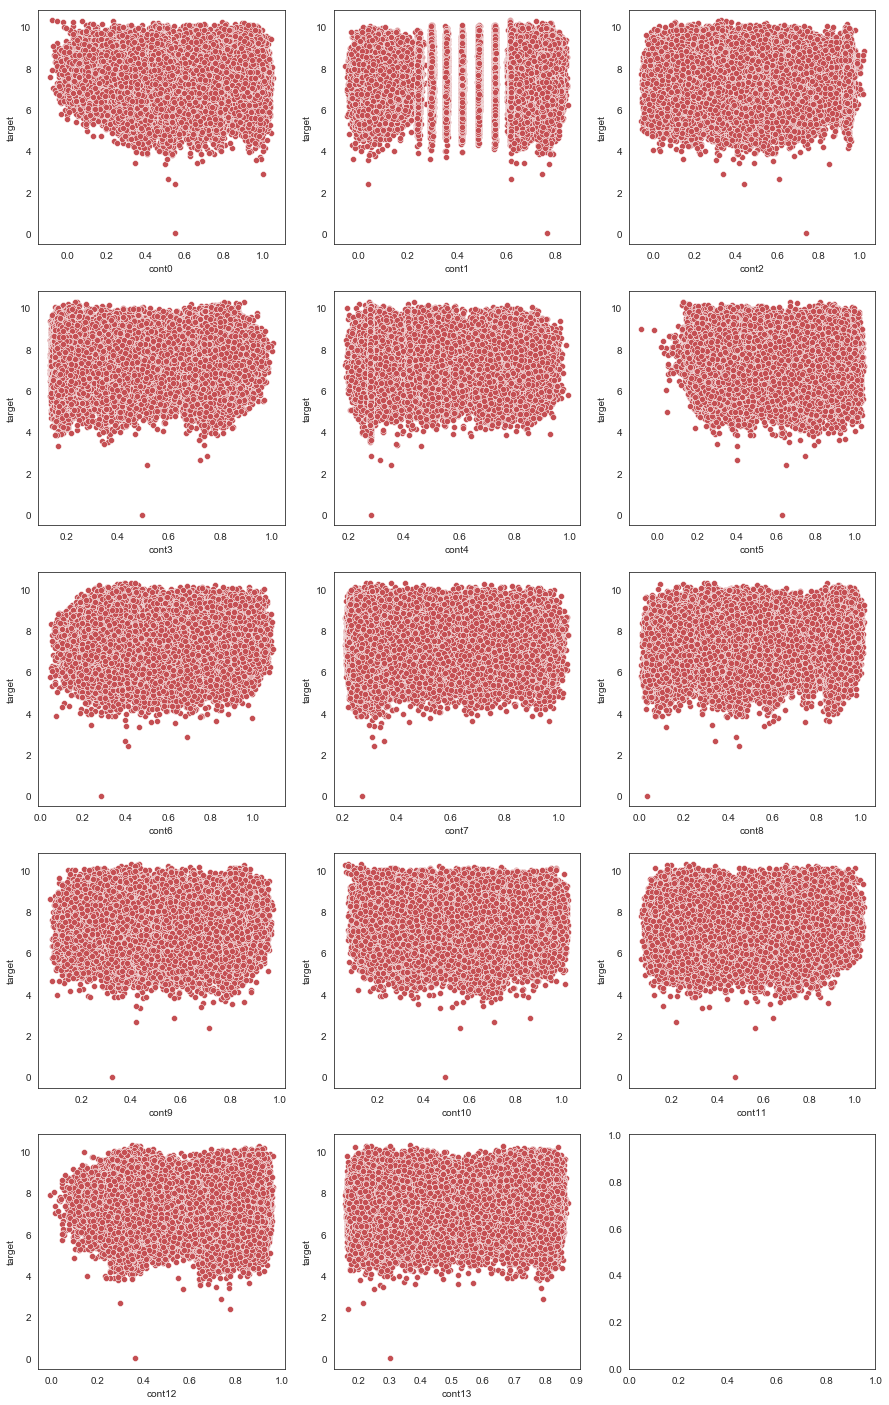

In [19]:
sns.set_style('white')
f,ax=plt.subplots(5,3,figsize=(15,25))
for i,feature in enumerate(cont_features,1):
    plt.subplot(5,3,i)
    sns.scatterplot(train[feature],train['target'],color='r')
    plt.xlabel(feature)
plt.show()    

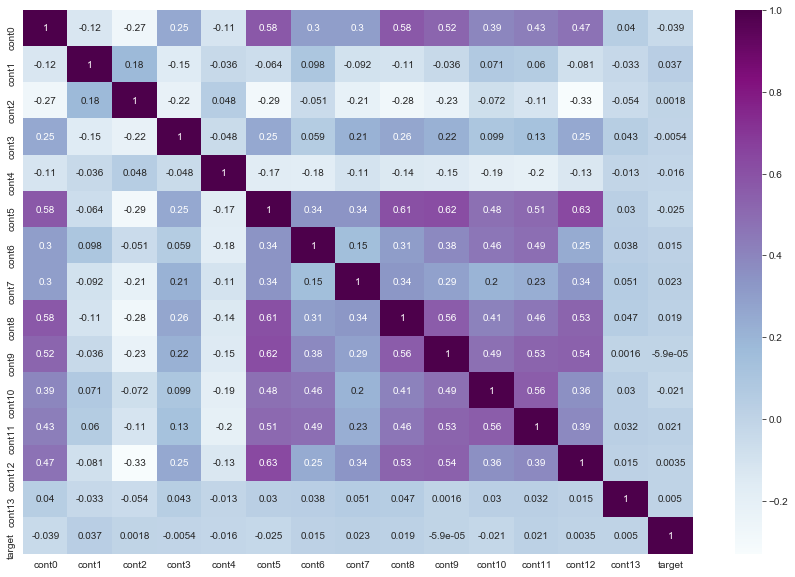

In [24]:
cont_corr=train.iloc[:,10:].corr()
plt.subplots(figsize=(15,10))
sns.heatmap(cont_corr,cmap='BuPu',annot=True)

In [26]:
train[cat_features].head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,A,B,A,A,B,D,A,E,C,I
1,B,A,A,A,B,B,A,E,A,F
2,A,A,A,C,B,D,A,B,C,N
3,A,A,A,C,B,D,A,E,G,K
4,A,B,A,A,B,B,A,E,C,F


In [27]:
train.cat0.value_counts()

A    281471
B     18529
Name: cat0, dtype: int64

In [29]:
train.cat1.value_counts()

A    162678
B    137322
Name: cat1, dtype: int64

In [33]:
for i in cat_features:
    print(train[i].value_counts())

A    281471
B     18529
Name: cat0, dtype: int64
A    162678
B    137322
Name: cat1, dtype: int64
A    276551
B     23449
Name: cat2, dtype: int64
C    183752
A    104464
D     11174
B       610
Name: cat3, dtype: int64
B    297373
A      1241
C       767
D       619
Name: cat4, dtype: int64
B    149208
D    135151
C     11763
A      3878
Name: cat5, dtype: int64
A    292643
B      6344
C       809
D       147
I        24
E        19
H        11
G         3
Name: cat6, dtype: int64
E    267631
D     24356
B      5750
G      1961
F       279
A        14
C         6
I         3
Name: cat7, dtype: int64
C    121054
E     94616
G     42195
A     37878
D      3694
F       549
B        14
Name: cat8, dtype: int64
F    107281
I     50064
L     42200
H     24759
K     20955
A     13408
G     10409
M      9838
J      6981
O      6173
N      4112
B      3435
C       209
D       103
E        73
Name: cat9, dtype: int64


In [133]:
df=train.copy()
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder(handle_unknown="ignore",sparse=False)

OH_cols_train = pd.DataFrame(one.fit_transform(train[cat_features]))
OH_cols_test = pd.DataFrame(one.fit_transform(test[cat_features]))

# One-hot encoding removed index; put it back
OH_cols_train.index = train.index
OH_cols_test.index = test.index

# Remove categorical columns (will replace with one-hot encoding)
num_train = train.drop(cat_features, axis=1)
num_test = test.drop(cat_features, axis=1)

# Add one-hot encoded columns to numerical features
e_train = pd.concat([num_train, OH_cols_train], axis=1) # Your code here
e_test = pd.concat([num_test, OH_cols_test], axis=1) # Your code here



In [140]:
e_train.shape

(300000, 72)

In [141]:
e_train.isnull().sum()

id        0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
         ..
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
53        0
54        0
55        0
Length: 72, dtype: int64

In [144]:
e_train.isna().sum()

id        0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
         ..
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
53        0
54        0
55        0
Length: 72, dtype: int64

In [ ]:
train.isnull().sum()

In [ ]:
plt.subplots(figsize=(15,12))
train.iloc[:,1:].boxplot()

In [ ]:
from sklearn import preprocessing
col_names=train.columns
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(train)
train = pd.DataFrame(scaled_df, columns=col_names)

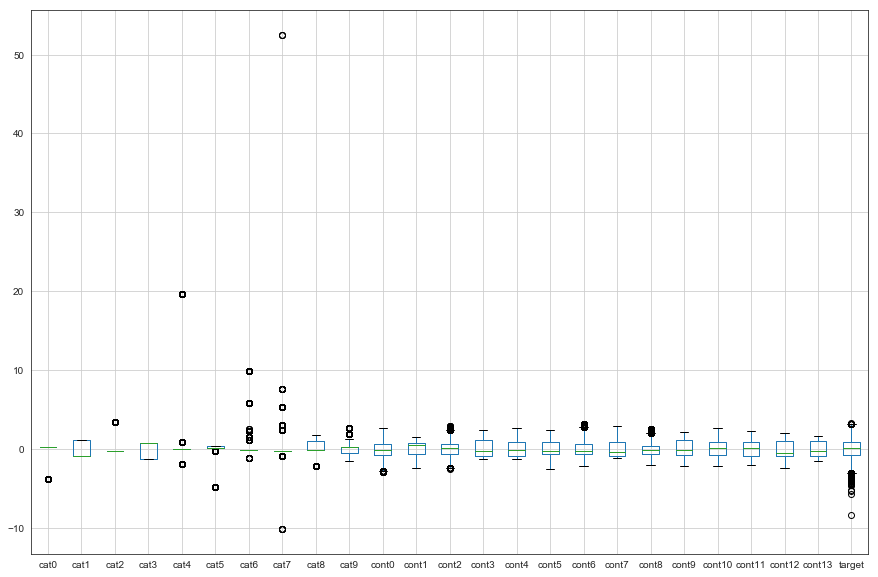

In [55]:
plt.subplots(figsize=(15,10))
train.iloc[:,1:].boxplot()

In [145]:
train=e_train[(-3<(e_train-e_train.mean())/e_train.std()) & (((e_train-e_train.mean())/e_train.std())<3)]

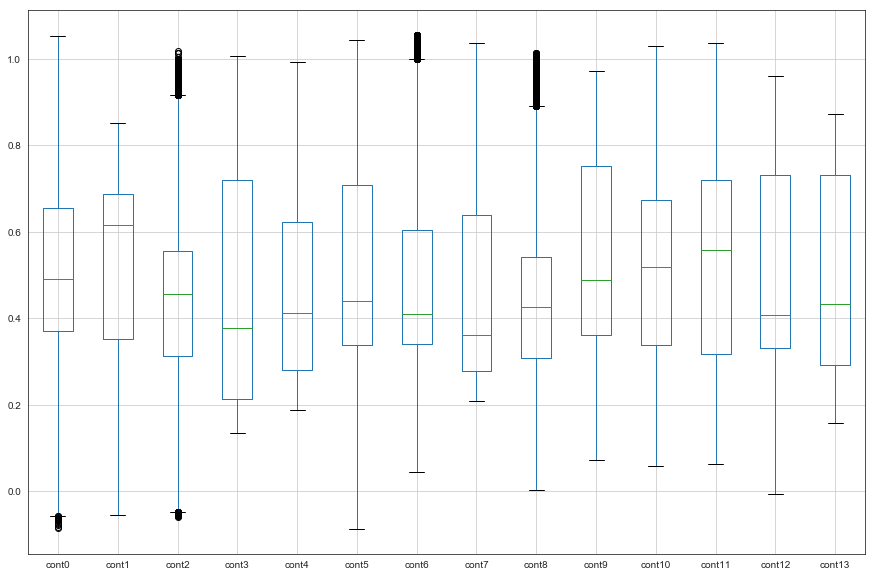

In [146]:
plt.subplots(figsize=(15,10))
train[cont_features].boxplot()

In [147]:
train.drop('id',inplace=True,axis=1)

In [148]:
y=df.target

In [149]:
train.drop('target',axis=1,inplace=True)

In [68]:
import xgboost as xgb
import optuna

In [112]:
# Xgboost

kf=KFold(n_splits=10,random_state=6,shuffle=True)
from sklearn.model_selection import train_test_split

def objective(trial,data=train,target=y):
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
        'tree_method':'hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'n_gpus':1,
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 100,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = np.sqrt(mean_squared_error(test_y, preds))
    
    return rmse

In [113]:
# CReating study to read on the parameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
study.trials_dataframe()

[I 2021-02-21 04:53:28,298] A new study created in memory with name: no-name-de03fd51-9596-49fd-835b-83ddb8ed436b


[04:53:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[04:56:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 04:56:52,614] Trial 0 finished with value: 0.8439616239893228 and parameters: {'lambda': 3.2568036735081507, 'alpha': 0.341606394079966, 'colsample_bytree': 0.7, 'subsample': 0.6, 'learning_rate': 0.012, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 58}. Best is trial 0 with value: 0.8439616239893228.


[04:56:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[04:58:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 04:58:41,219] Trial 1 finished with value: 0.8439049570238353 and parameters: {'lambda': 0.013650940491756197, 'alpha': 0.005516276043956467, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.018, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 199}. Best is trial 1 with value: 0.8439049570238353.


[04:58:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:00:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:00:29,196] Trial 2 finished with value: 0.8444477293525864 and parameters: {'lambda': 3.4544570815824414, 'alpha': 0.027967211264911838, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 76}. Best is trial 1 with value: 0.8439049570238353.


[05:00:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:02:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:02:49,846] Trial 3 finished with value: 0.8435317874087357 and parameters: {'lambda': 0.2173049262676658, 'alpha': 0.024578910717939065, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.016, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 280}. Best is trial 3 with value: 0.8435317874087357.


[05:02:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:04:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:04:36,687] Trial 4 finished with value: 0.8450863756492675 and parameters: {'lambda': 2.3197784329451494, 'alpha': 1.7861854941440705, 'colsample_bytree': 0.7, 'subsample': 0.6, 'learning_rate': 0.016, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 229}. Best is trial 3 with value: 0.8435317874087357.


[05:04:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:06:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:06:14,275] Trial 5 finished with value: 0.8439809794907476 and parameters: {'lambda': 1.6018289536947523, 'alpha': 0.12559216019075706, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.018, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 238}. Best is trial 3 with value: 0.8435317874087357.


[05:06:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:09:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:09:08,052] Trial 6 finished with value: 0.8445984502001624 and parameters: {'lambda': 0.08855933456060659, 'alpha': 4.969873596355008, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 254}. Best is trial 3 with value: 0.8435317874087357.


[05:09:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:10:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:10:43,586] Trial 7 finished with value: 0.844606084838059 and parameters: {'lambda': 0.0014488862140423456, 'alpha': 8.932913580805582, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 20, 'random_state': 2020, 'min_child_weight': 291}. Best is trial 3 with value: 0.8435317874087357.


[05:10:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:12:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:12:39,151] Trial 8 finished with value: 0.8467770713083492 and parameters: {'lambda': 0.0346705564022948, 'alpha': 0.02494579908033053, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 123}. Best is trial 3 with value: 0.8435317874087357.


[05:12:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:16:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:16:15,880] Trial 9 finished with value: 0.8437444998451039 and parameters: {'lambda': 4.657529033592727, 'alpha': 4.134803065649606, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.008, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 289}. Best is trial 3 with value: 0.8435317874087357.


[05:16:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:20:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:20:37,002] Trial 10 finished with value: 0.8456038825264407 and parameters: {'lambda': 0.34263932351360854, 'alpha': 0.0015393053227676181, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.016, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 6}. Best is trial 3 with value: 0.8435317874087357.


[05:21:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:25:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:25:11,281] Trial 11 finished with value: 0.8437814841637005 and parameters: {'lambda': 0.39789601613444675, 'alpha': 0.6216041129282068, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.008, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 300}. Best is trial 3 with value: 0.8435317874087357.


[05:25:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:29:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:29:06,096] Trial 12 finished with value: 0.8443007411585852 and parameters: {'lambda': 0.0048284900928974575, 'alpha': 0.018698413560430803, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.009, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 179}. Best is trial 3 with value: 0.8435317874087357.


[05:29:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:31:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:31:42,853] Trial 13 finished with value: 0.8438036136594171 and parameters: {'lambda': 8.504980383455194, 'alpha': 0.004075899438767253, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.014, 'max_depth': 17, 'random_state': 48, 'min_child_weight': 288}. Best is trial 3 with value: 0.8435317874087357.


[05:31:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:35:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:35:04,360] Trial 14 finished with value: 0.8438349363285459 and parameters: {'lambda': 0.5049486408743072, 'alpha': 0.07954165158349649, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.008, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 275}. Best is trial 3 with value: 0.8435317874087357.


[05:35:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:38:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:38:35,754] Trial 15 finished with value: 0.8434963779548694 and parameters: {'lambda': 0.17590541760120554, 'alpha': 0.12314575998380399, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.008, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 143}. Best is trial 15 with value: 0.8434963779548694.


[05:38:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:40:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:40:36,712] Trial 16 finished with value: 0.8438328042046477 and parameters: {'lambda': 0.12462576082471952, 'alpha': 0.11533362128169129, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.016, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 138}. Best is trial 15 with value: 0.8434963779548694.


[05:40:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:43:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:43:51,858] Trial 17 finished with value: 0.8435419749805083 and parameters: {'lambda': 0.10124597515908067, 'alpha': 0.009579089723086114, 'colsample_bytree': 0.3, 'subsample': 0.5, 'learning_rate': 0.009, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 113}. Best is trial 15 with value: 0.8434963779548694.


[05:43:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:47:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:47:13,597] Trial 18 finished with value: 0.8437538943357905 and parameters: {'lambda': 0.7935168573479014, 'alpha': 0.34550847860561157, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 11, 'random_state': 24, 'min_child_weight': 172}. Best is trial 15 with value: 0.8434963779548694.


[05:47:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[05:49:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


[I 2021-02-21 05:49:44,632] Trial 19 finished with value: 0.845611729189388 and parameters: {'lambda': 0.039501255093433385, 'alpha': 0.06167003926671076, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 91}. Best is trial 15 with value: 0.8434963779548694.


[05:49:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.3.0\include\xgboost/generic_parameters.h:39: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


KeyboardInterrupt: 

In [150]:
e_test.drop('id',axis=1,inplace=True)

In [176]:
Best_trial = {'tree_method':'hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': 0.102,
        'alpha': 0.009,
        'colsample_bytree': 0.3,
        'subsample': 0.5,
        'learning_rate': 0.09,
        'n_estimators': 100,
        'max_depth': 7,
        'random_state': 24,
        'min_child_weight': 140,
    }
rmse_values=[]
preds=np.zeros(e_test.shape[0])
n=0
target=y
for train_index,test_index in kf.split(train,target):
    x_train,x_val = train.iloc[train_index],train.iloc[test_index]
    y_train,y_val = target.iloc[train_index],target.iloc[test_index]
    
    #xgboost regressor with optimized parameters 
    model = xgb.XGBRegressor(**Best_trial)
    model.fit(x_train,y_train,eval_set=[(x_val,y_val)],early_stopping_rounds=100,verbose=1)
    
    #predicting on test data provided in separate file(actual test data not validation)
    preds+=model.predict(e_test)/kf.n_splits   #
    
    # calculating rmse values on validation data
    rmse_values.append(mean_squared_error(y_val, model.predict(x_val)))
    print(n+1,rmse_values[n])
    n+=1
print(f"mean RMSE for all the folds is {np.mean(rmse_values)}")

[0]	validation_0-rmse:6.39425
[1]	validation_0-rmse:5.83012
[2]	validation_0-rmse:5.31802
[3]	validation_0-rmse:4.85348
[4]	validation_0-rmse:4.43199
[5]	validation_0-rmse:4.04934
[6]	validation_0-rmse:3.70267
[7]	validation_0-rmse:3.38880
[8]	validation_0-rmse:3.10524
[9]	validation_0-rmse:2.84870
[10]	validation_0-rmse:2.61722
[11]	validation_0-rmse:2.40867
[12]	validation_0-rmse:2.22102
[13]	validation_0-rmse:2.05267
[14]	validation_0-rmse:1.90208
[15]	validation_0-rmse:1.76752
[16]	validation_0-rmse:1.64751
[17]	validation_0-rmse:1.54113
[18]	validation_0-rmse:1.44703
[19]	validation_0-rmse:1.36420
[20]	validation_0-rmse:1.29158
[21]	validation_0-rmse:1.22801
[22]	validation_0-rmse:1.17290
[23]	validation_0-rmse:1.12516
[24]	validation_0-rmse:1.08397
[25]	validation_0-rmse:1.04849
[26]	validation_0-rmse:1.01817
[27]	validation_0-rmse:0.99212
[28]	validation_0-rmse:0.97016
[29]	validation_0-rmse:0.95153
[30]	validation_0-rmse:0.93580
[31]	validation_0-rmse:0.92243
[32]	validation_0-

[64]	validation_0-rmse:0.84717
[65]	validation_0-rmse:0.84708
[66]	validation_0-rmse:0.84693
[67]	validation_0-rmse:0.84685
[68]	validation_0-rmse:0.84674
[69]	validation_0-rmse:0.84665
[70]	validation_0-rmse:0.84652
[71]	validation_0-rmse:0.84635
[72]	validation_0-rmse:0.84619
[73]	validation_0-rmse:0.84612
[74]	validation_0-rmse:0.84597
[75]	validation_0-rmse:0.84589
[76]	validation_0-rmse:0.84584
[77]	validation_0-rmse:0.84577
[78]	validation_0-rmse:0.84569
[79]	validation_0-rmse:0.84562
[80]	validation_0-rmse:0.84560
[81]	validation_0-rmse:0.84547
[82]	validation_0-rmse:0.84540
[83]	validation_0-rmse:0.84536
[84]	validation_0-rmse:0.84532
[85]	validation_0-rmse:0.84525
[86]	validation_0-rmse:0.84517
[87]	validation_0-rmse:0.84511
[88]	validation_0-rmse:0.84509
[89]	validation_0-rmse:0.84506
[90]	validation_0-rmse:0.84503
[91]	validation_0-rmse:0.84497
[92]	validation_0-rmse:0.84493
[93]	validation_0-rmse:0.84492
[94]	validation_0-rmse:0.84480
[95]	validation_0-rmse:0.84466
[96]	val

[28]	validation_0-rmse:0.96924
[29]	validation_0-rmse:0.95067
[30]	validation_0-rmse:0.93500
[31]	validation_0-rmse:0.92197
[32]	validation_0-rmse:0.91102
[33]	validation_0-rmse:0.90166
[34]	validation_0-rmse:0.89381
[35]	validation_0-rmse:0.88738
[36]	validation_0-rmse:0.88197
[37]	validation_0-rmse:0.87746
[38]	validation_0-rmse:0.87377
[39]	validation_0-rmse:0.87049
[40]	validation_0-rmse:0.86783
[41]	validation_0-rmse:0.86544
[42]	validation_0-rmse:0.86360
[43]	validation_0-rmse:0.86198
[44]	validation_0-rmse:0.86059
[45]	validation_0-rmse:0.85942
[46]	validation_0-rmse:0.85850
[47]	validation_0-rmse:0.85763
[48]	validation_0-rmse:0.85693
[49]	validation_0-rmse:0.85635
[50]	validation_0-rmse:0.85576
[51]	validation_0-rmse:0.85536
[52]	validation_0-rmse:0.85499
[53]	validation_0-rmse:0.85457
[54]	validation_0-rmse:0.85427
[55]	validation_0-rmse:0.85401
[56]	validation_0-rmse:0.85376
[57]	validation_0-rmse:0.85362
[58]	validation_0-rmse:0.85345
[59]	validation_0-rmse:0.85323
[60]	val

[92]	validation_0-rmse:0.84601
[93]	validation_0-rmse:0.84599
[94]	validation_0-rmse:0.84591
[95]	validation_0-rmse:0.84587
[96]	validation_0-rmse:0.84583
[97]	validation_0-rmse:0.84577
[98]	validation_0-rmse:0.84576
[99]	validation_0-rmse:0.84572
8 0.7152508052253989
[0]	validation_0-rmse:6.39748
[1]	validation_0-rmse:5.83361
[2]	validation_0-rmse:5.32142
[3]	validation_0-rmse:4.85662
[4]	validation_0-rmse:4.43449
[5]	validation_0-rmse:4.05164
[6]	validation_0-rmse:3.70480
[7]	validation_0-rmse:3.39102
[8]	validation_0-rmse:3.10691
[9]	validation_0-rmse:2.85018
[10]	validation_0-rmse:2.61852
[11]	validation_0-rmse:2.40996
[12]	validation_0-rmse:2.22216
[13]	validation_0-rmse:2.05374
[14]	validation_0-rmse:1.90314
[15]	validation_0-rmse:1.76846
[16]	validation_0-rmse:1.64846
[17]	validation_0-rmse:1.54211
[18]	validation_0-rmse:1.44781
[19]	validation_0-rmse:1.36511
[20]	validation_0-rmse:1.29239
[21]	validation_0-rmse:1.22861
[22]	validation_0-rmse:1.17328
[23]	validation_0-rmse:1.125

<Figure size 1152x864 with 0 Axes>

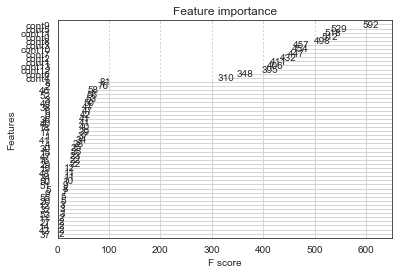

In [180]:
# Find important features in the model
plt.figure(figsize = (16, 12))
xgb.plot_importance(model)

plt.show()

In [183]:
submission['target'] = preds
submission.to_csv("pfeb.csv", index=False)

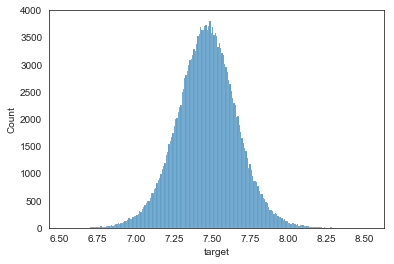

In [185]:
sns.histplot(submission.target)


In [159]:
test.isna().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
dtype: int64

In [173]:
test['cat6'].value_counts().sum()

200000

In [175]:
e_test['55']=0

In [187]:
import os
os.getcwd()

'C:\\Users\\LInBlue'

In [190]:
import lightgbm as lgb

In [215]:
class EnsembleModel:
    def __init__(self, params):
        """
        LGB + XGB model
        """
        self.lgb_params = params['lgb']
        self.xgb_params = params['xgb']

        self.lgb_model = lgb.LGBMRegressor(**self.lgb_params)
        self.xgb_model = xgb.XGBRegressor(**self.xgb_params)

    def fit(self, x, y, *args, **kwargs):
        return (self.lgb_model.fit(x, y, *args, **kwargs),
                self.xgb_model.fit(x, y, *args, **kwargs))

    def predict(self, x, weights=[1.0, 1.0]):
        """
        Generate model predictions
        :param x: data
        :param weights: weights on model prediction, first one is the weight on lgb model
        :return: array with predictions
        """
        return (weights[0] * self.lgb_model.predict(x) +
                weights[1] * self.xgb_model.predict(x)) / 2

In [216]:
ensemble_params = {
    "lgb" : {
    
          'metric': 'rmse',
          'n_estimators': 500,
          'bagging_seed': 12,
          'feature_fraction_seed': 14,
          'learning_rate': 0.009899156646724397,
          'max_depth': 27,
          'num_leaves': 63,
          'reg_alpha': 9.562925363678952,
          'reg_lambda': 9.355810045480153,
          'colsample_bytree': 0.2256038826485174,
          'min_child_samples': 100,
          'subsample_freq': 1,
          'subsample': 0.8805303688019942,
          'max_bin': 882,
          'min_data_per_group': 127,
          },
    'xgb': {
        
        'lambda': 0.102,
        'alpha': 0.009,
        'colsample_bytree': 0.3,
        'subsample': 0.5,
        'learning_rate': 0.09,
        'n_estimators': 300,
        'max_depth': 7,
        'random_state': 24,
        'min_child_weight': 140
    }
    
}
    
preds = np.zeros(e_test.shape[0])
kf = KFold(n_splits=5, random_state=22, shuffle=True)
rmse = []
n = 0
oof = np.zeros(train.shape[0])

for trn_idx, test_idx in kf.split(train, target):

    X_tr, X_val=train.iloc[trn_idx], train.iloc[test_idx]
    y_tr, y_val=target.iloc[trn_idx], target.iloc[test_idx]

    model = EnsembleModel(ensemble_params)

    model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)
    oof[test_idx]=model.predict(X_val)
    preds += model.predict(e_test) / kf.n_splits
    rmse.append(np.sqrt(mean_squared_error(y_val, oof[test_idx])))
    
    print(f"Fold {n+1}, RMSE: {rmse[n]}")
    n += 1

print("Mean RMSE: ", np.mean(rmse))
rmse = np.sqrt(mean_squared_error(target, oof))
print('frmse',rmse)



Fold 1, RMSE: 0.8447381716313803
Fold 2, RMSE: 0.8436012095943156
Fold 3, RMSE: 0.8467317982641962
Fold 4, RMSE: 0.8465102756233658
Fold 5, RMSE: 0.8442635502840066
Mean RMSE:  0.8451690010794529
frmse 0.8451699127046515


In [217]:
submission['target'] = preds
submission.to_csv("pfeb1.csv", index=False)

In [203]:
train.shape

(300000, 70)